In [1]:
import twint

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
import pandas as pd

In [71]:
egMostPopular = ['MoSalah','Byoussef', 'amrkhaled', 'amrdiab', 'youm7','MustafaHosny','OfficialHenedy','HamzaNamira','ahelmy', 'yasminesabri', 'ElSherif']

for item in egMostPopular:
    c = twint.Config()
    c.Username = item
    c.Count = True
    c.Store_csv = True
    c.Output = 'Profile Info Approach/AllFollowers.csv'
    c.Limit = 40000
    c.Count = True
    c.Hide_output = True
    twint.run.Followers(c)

[+] Finished: Successfully collected all 40009 users who follow @Byoussef.
[+] Finished: Successfully collected all 40018 users who follow @amrkhaled.
[+] Finished: Successfully collected all 40011 users who follow @ahelmy.


CRITICAL:root:twint.get:User:Cannot connect to host twitter.com:443 ssl:True [Connect call failed ('104.244.42.1', 443)]


[+] Finished: Successfully collected all 40014 users who follow @yasminesabri.
[+] Finished: Successfully collected all 40013 users who follow @ElSherif.


In [72]:
followers = pd.read_csv('Profile Info Approach/AllFollowers.csv')

In [73]:
unique_followers = pd.DataFrame(followers['username'].unique(), columns=['username'])
unique_followers

,username
0,erwan59829939
1,sytzmgrllnsxvtc
2,ali55475667
3,vtkugc5a6f9zmrw
4,wo6sgbu8iyadkmr
...,...
279237,mosta36669517
279238,mohamed21130288
279239,ujoogiyfhbvjy25
279240,haneena07890735


In [74]:
def get_followers_info(username):
    d = twint.Config()
    d.Username = username
    d.Store_csv = True
    d.Output = 'Followers_info.csv'
    twint.run.Lookup(d)

In [ ]:
unique_followers['username'].apply(get_followers_info)

In [76]:
unique_followers_info = pd.read_csv('Profile Info Approach/UniqueFollowersInfo.csv')
unique_followers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26326 entries, 0 to 26325
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 26326 non-null  int64 
 1   name               26326 non-null  object
 2   username           26326 non-null  object
 3   bio                15124 non-null  object
 4   location           2804 non-null   object
 5   url                620 non-null    object
 6   join_date          26326 non-null  object
 7   join_time          26326 non-null  object
 8   tweets             26326 non-null  int64 
 9   following          26326 non-null  int64 
 10  followers          26326 non-null  int64 
 11  likes              26326 non-null  int64 
 12  media              26326 non-null  int64 
 13  private            26326 non-null  int64 
 14  verified           26326 non-null  int64 
 15  profile_image_url  26326 non-null  object
 16  background_image   6616 non-null   objec

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

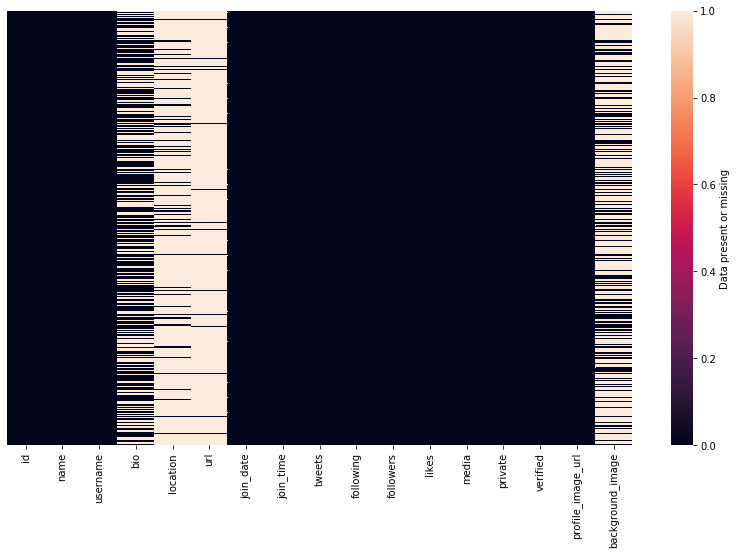

In [45]:
plt.figure(figsize=(14,8))
sns.heatmap(unique_followers_info.isnull(), yticklabels=False, cbar_kws=dict(label='Data present or missing'))

In [ ]:
public_followers_info = unique_followers_info[unique_followers_info['private'] == 0]
public_followers_info.info()

In [ ]:
public_followers_info.to_csv('Profile Info Approach/PublicUniqueFollowers.csv')

In [ ]:
tweeted_followers_info = public_followers_info[public_followers_info['tweets'] > 0]
tweeted_followers_info.info()

In [ ]:
tweeted_followers_info.to_csv('Profile Info Approach/TweetedPublicUniqueFollowers.csv')

In [ ]:
from datetime import datetime

In [ ]:
deadline = datetime.strptime('23 Mar 2020', '%d %b %Y')

In [ ]:
tweeted_followers_info['join_date'] = tweeted_followers_info['join_date'].apply(lambda x: datetime.strptime(x, '%d %b %Y'))

In [ ]:
joined_ready_followers_info = tweeted_followers_info[tweeted_followers_info['join_date'] < deadline]
joined_ready_followers_info.info()

In [ ]:
bio_followers = joined_ready_followers_info[joined_ready_followers_info['bio'].notnull()]

In [ ]:
location_followers = joined_ready_followers_info[joined_ready_followers_info['location'].notnull()]

In [ ]:
location_bio_ready_followers = pd.concat([bio_followers,location_followers]).drop_duplicates().reset_index(drop=True)
location_bio_ready_followers.info()

In [ ]:
governorates = pd.read_csv('Governorates.csv')

In [ ]:
gov_names_en = list(governorates['Name'])

In [ ]:
gov_names_ar = list(governorates['Native'])

In [ ]:
gov_names_en = list(map(lambda x: x.lower(), gov_names_en))

In [ ]:
def gov_check(text):
    found = 'Not Found'
    found = gov_check_uni(text)
    if found == 'Not Found':
        found = gov_check_bi(text)
    return found

In [ ]:
def gov_check_uni(text):
    text = str(text)
    found = False
    for word in text.lower().split():
        for gov in gov_names_en:
            if gov in word:
                found = True
                return gov
        for gov in gov_names_ar:
            if gov in word:
                found = True
                return gov
    if found == False:
        return 'Not Found'

In [ ]:
def gov_check_bi(text):
    text = str(text)
    found = False
    word_list = text.lower().split()
    for i in range(1,len(word_list)):
        current = word_list[i-1]
        next = word_list[i]
        word = ' '.join([current,next])
        if word in gov_names_en:
            found = True
            return word
        if word in gov_names_ar:
            found = True
            return word
    if found == False:
        return 'Not Found'

In [ ]:
joined_ready_followers_info['governorate_loc'] = joined_ready_followers_info['location'].apply(gov_check)

In [ ]:
joined_ready_followers_info['governorate_bio'] = joined_ready_followers_info['bio'].apply(gov_check)

In [ ]:
gov_dct = {'الشرقية':'Sharqia', 'القاهرة':'Cairo', 'المنوفية':'Monufia', 'الدقهلية':'Dakahlia', 'السويس':'Suez', 'سوهاج':'Sohag', 'دمياط':'Damietta',
          'الغربية':'Gharbia', 'القليوبية':'Qalyubia', 'الفيوم':'Fayoum', 'الجيزة':'Giza', 'أسوان':'Aswan', 'البحيرة':'Beheira', 'الإسماعيلية':'Ismailia', 'قنا':'Qena',
          'أسيوط':'Asyut', 'المنيا':'Al-Minya', 'كفر الشيخ':'Kafr el-Sheikh', 'الإسكندرية':'Alexandria', 'الأقصر':'Luxor', 'بنى سويف':'Beni Suef', 'شمال سيناء':'North Sinai', 
           'Not Found':'Not Found', 'cairo':'Cairo', 'luxor':'Luxor', 'suez':'Suez', 'alexandria':'Alexandria', 'giza':'Giza',
          'north sinai':'North Sinai', 'damietta':'Damietta', 'gharbia':'Gharbia', 'aswan':'Aswan', 'qena':'Qena', 'sohag':'Sohag',
          'dakahlia':'Dakahlia', 'ismailia':'Ismailia', 'beni suef':'Beni Suef', 'sharqia': 'Sharqia', 'matrouh':'Matrouh', 'port said':'Port Said',
          'asyut': 'Asyut','fayoum': 'Fayoum', 'red sea':'Red Sea', 'kafr el-sheikh':'Kafr el-Sheikh', 'qalyubia':'Qalyubia', 'south sinai': 'South Sinai'}

In [ ]:
joined_ready_followers_info['governorate_loc'] = [gov_dct[x] for x in joined_ready_followers_info['governorate_loc']]

In [ ]:
joined_ready_followers_info['governorate_bio'] = [gov_dct[x] for x in joined_ready_followers_info['governorate_bio']]

In [ ]:
by_location = joined_ready_followers_info[joined_ready_followers_info['governorate_loc'] != 'Not Found']

In [ ]:
by_bio = joined_ready_followers_info[joined_ready_followers_info['governorate_bio'] != 'Not Found']

In [ ]:
location_bio_followers_info = pd.concat([by_location, by_bio]).drop_duplicates()

In [ ]:
govs = []
for i in range(0,len(location_bio_followers_info)):
    row = location_bio_followers_info.iloc[i]
    loc = row['governorate_loc']
    if loc == 'Not Found':
        loc = row['governorate_bio']
    govs.append(loc)
    
location_bio_followers_info['governorate'] = govs

In [ ]:
location_bio_followers_info.to_csv('Profile Info Approach/Governorated Followers Info.csv')

In [ ]:
def profile_search(username):
    d = twint.Config()
    d.Since = "2020-3-08"
    d.Until = "2020-3-22"
    d.Lang = "en"
    d.Store_csv = True
    d.Username = username
    d.Output = 'Profile Info Approach/EgyptianEnglishProfileInfoTweets.csv'
    twint.run.Search(d)

In [ ]:
location_bio_followers_info['username'].apply(profile_search)

In [ ]:
english_profile_info_tweets = pd.read_csv('Profile Info Approach/EgyptianEnglishProfileInfoTweets.csv')

english_profile_info_tweets.drop_duplicates(inplace=True)
english_profile_info_tweets.reset_index(drop=True, inplace=True)
english_profile_info_tweets.drop(['id', 'conversation_id', 'created_at', 'timezone', 'user_id', 'mentions', 'photos', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace=True)


In [ ]:
username_gov = location_bio_followers_info[['username', 'governorate']]

In [ ]:
username_gov['username'] = username_gov['username'].apply(lambda x: x.lower())

In [ ]:
english_profile_info_tweets = pd.merge(english_profile_info_tweets,username_gov,on='username')

In [ ]:
english_profile_info_tweets['language'] = 'English'

In [ ]:
english_profile_info_tweets['method'] = 'Profile Info'

In [ ]:
english_profile_info_tweets.drop(['id', 'conversation_id', 'created_at', 'timezone', 'user_id', 'mentions', 'photos', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace=True)


In [ ]:
english_profile_info_tweets.to_csv('EgyptianEnglishProfileInfoTweets.csv')

In [ ]:
arabic_profile_info_tweets = pd.read_csv('EgyptianArabicProfileInfoTweets.csv')

In [ ]:
egyptian_profile_info_tweets = pd.concat([arabic_profile_info_tweets,english_profile_info_tweets]).reset_index(drop=True)

In [ ]:
egyptian_profile_info_tweets.to_csv('EgyptianProfileInfoTweets.csv')